In [21]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [22]:
input_size = 1
output_size = 1
num_epochs = 600
learning_rate = 0.0001

# 准备数据集
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# 定义网络结构 y=w*x+b 其中w的size [1,1], b的size[1,]
model = nn.Linear(input_size, output_size)

# Loss and optimizer 3.定义损失函数， 使用的是最小平方误差函数
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_dict = []

In [23]:
# 训练

for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors  5.1 准备tensor的训练数据和标签
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    
    # 前向传播
    outputs = model(inputs)
    
    # 计算损失
    loss = criterion(outputs, targets)
    
    # 反向传播，及参数的优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 打印信息
    loss_dict.append(loss.item())
    if (epoch+1) % 5 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/600], Loss: 0.2019
Epoch [10/600], Loss: 0.2015
Epoch [15/600], Loss: 0.2011
Epoch [20/600], Loss: 0.2007
Epoch [25/600], Loss: 0.2004
Epoch [30/600], Loss: 0.2002
Epoch [35/600], Loss: 0.1999
Epoch [40/600], Loss: 0.1997
Epoch [45/600], Loss: 0.1994
Epoch [50/600], Loss: 0.1992
Epoch [55/600], Loss: 0.1990
Epoch [60/600], Loss: 0.1989
Epoch [65/600], Loss: 0.1987
Epoch [70/600], Loss: 0.1986
Epoch [75/600], Loss: 0.1984
Epoch [80/600], Loss: 0.1983
Epoch [85/600], Loss: 0.1982
Epoch [90/600], Loss: 0.1981
Epoch [95/600], Loss: 0.1980
Epoch [100/600], Loss: 0.1979
Epoch [105/600], Loss: 0.1978
Epoch [110/600], Loss: 0.1977
Epoch [115/600], Loss: 0.1977
Epoch [120/600], Loss: 0.1976
Epoch [125/600], Loss: 0.1975
Epoch [130/600], Loss: 0.1975
Epoch [135/600], Loss: 0.1974
Epoch [140/600], Loss: 0.1974
Epoch [145/600], Loss: 0.1973
Epoch [150/600], Loss: 0.1973
Epoch [155/600], Loss: 0.1973
Epoch [160/600], Loss: 0.1972
Epoch [165/600], Loss: 0.1972
Epoch [170/600], Loss: 0.1972


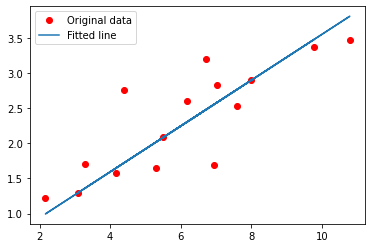

In [24]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

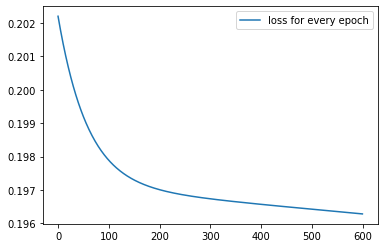

In [25]:
# 画loss在迭代过程中的变化情况
plt.plot(loss_dict, label='loss for every epoch')
plt.legend()
plt.show()